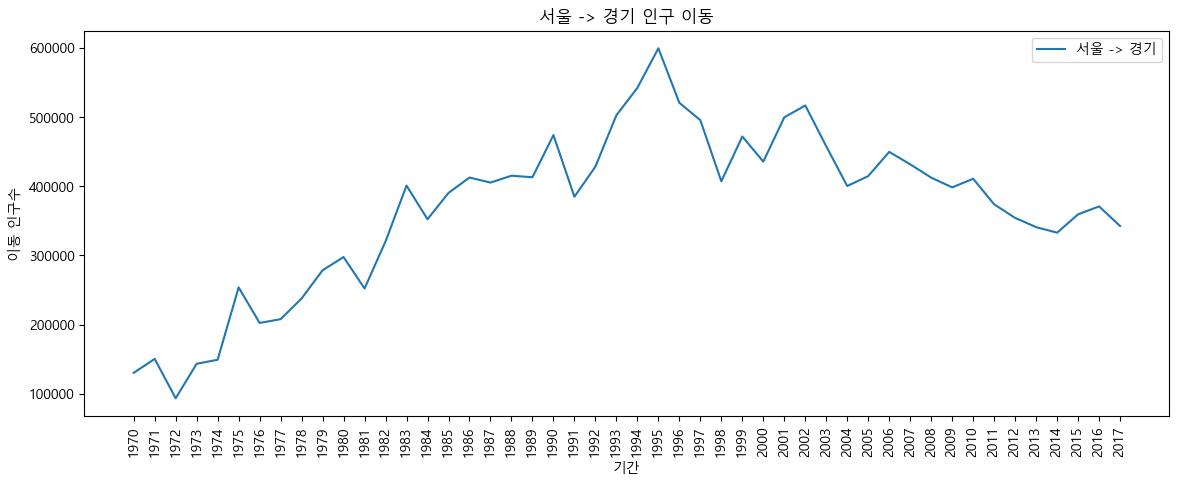

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

# 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.ffill()

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul = df_seoul.rename({'전입지별':'전입지'}, axis=1)
df_seoul = df_seoul.set_index('전입지')

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

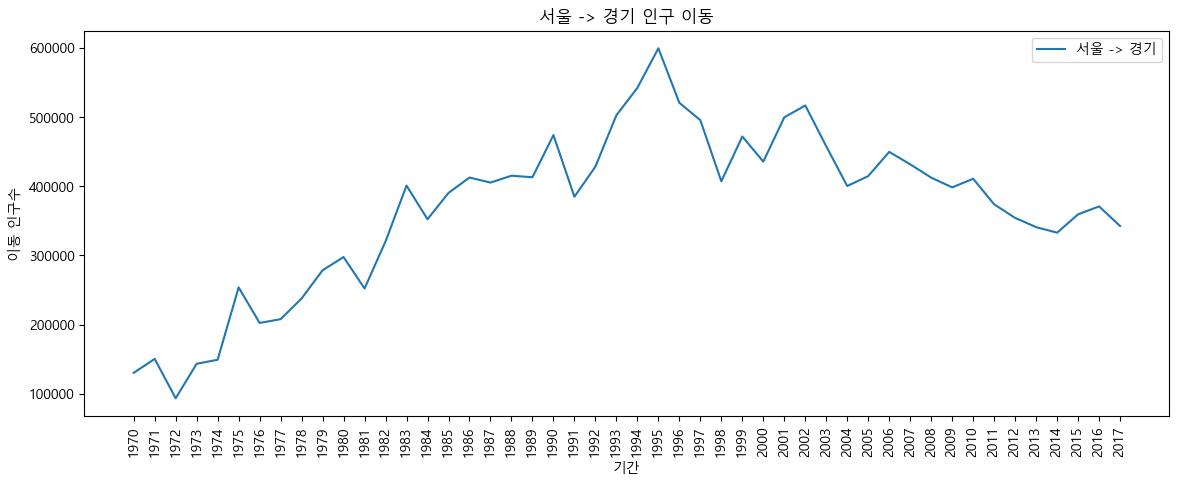

In [7]:
# 그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

# x, y축 데이터를 plot 함수에 입력 
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')  #차트 제목
plt.xlabel('기간')                  #x축 이름
plt.ylabel('이동 인구수')           #y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.show()  # 변경사항 저장하고 그래프 출력

In [17]:
# 경기 -> 서울
df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')
# 1. 데이터의 대략적인 구조 확인 head()
# 2. 데이터의 정보 확인 info(), describe()
# 3. 결측치 여부 확인
# 결측치가 확인되면 drop fillna 선택

df.head() #df.tail()
df['전출지별'].value_counts()
df['전출지별'].ffill() # 결측치 대체, 문자열이고 병합된 컬럼의 정보가 na로 표기되어 앞의 문자열로 대체

# df.info()
df.isna().sum().values.sum() #np.int64(306)

df.describe()
pd.to_numeric(df.loc[1:,'1970'], errors='coerce') #문자형 숫자 -> 숫자형으로 변경하는데, 변경불가능한 데이터는 결측치로 대체

1      4046536.0
2      1742813.0
3       448577.0
4            NaN
5            NaN
         ...    
320        139.0
321        631.0
322        374.0
323        474.0
324       9290.0
Name: 1970, Length: 324, dtype: float64

In [27]:
df['전출지별'] = df['전출지별'].ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [44]:
mask = (df['전출지별'] == '경기도') & (df['전입지별'] == '서울특별시')
df2 = df[mask]
df2

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,경기도,서울특별시,95388,95423,90470,107177,107518,207641,144524,154021,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


In [45]:
df2.isna().sum().values.sum() #결측치 없음
df3 = df2.iloc[:,2:]
df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
164,95388,95423,90470,107177,107518,207641,144524,154021,164771,168188,...,323515,317952,285963,272407,254175,246464,249701,239557,234357,234448


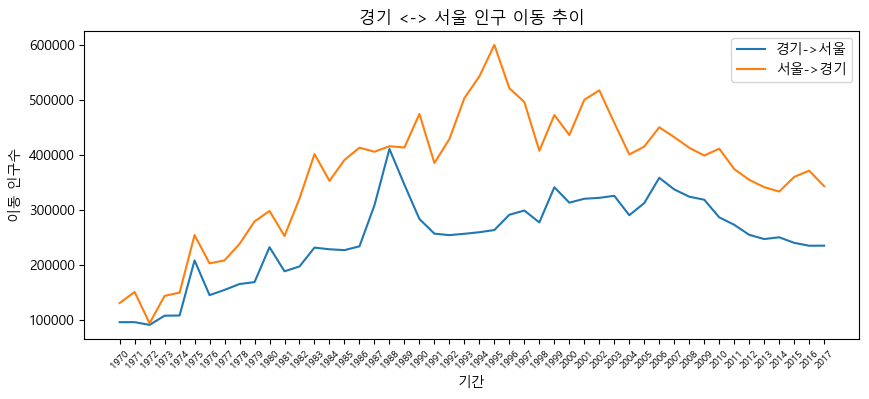

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df3.columns, df3.values.flatten(), label='경기->서울') #경기 -> 서울
plt.plot(sr_one.index, sr_one.values, label='서울->경기') #서울 -> 경기
plt.xticks(rotation=45, fontsize=7)

plt.title('경기 <-> 서울 인구 이동 추이')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

# plt.legend(labels = ['경기->서울', '서울->경기'] loc='best') #범례
plt.legend(loc='best')


plt.show()

In [48]:
# 1991 ~ 1995 데이터를 추출해서 gpt를 통해 인구이동에대한 추론
print(df3.loc[:,'1991':'1995'])

sr_one['1991':'1995']

       1991    1992    1993    1994    1995
164  256270  253605  256049  258897  262893


1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
Name: 경기도, dtype: object

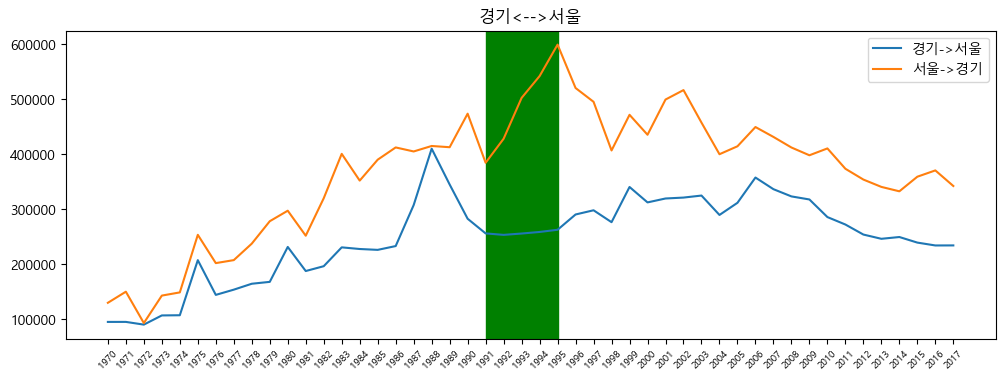

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기")           # 서울 -> 경기

plt.legend(loc='best')

plt.axvspan('1991','1995',color = 'green')
plt.xticks(rotation=45,fontsize = 7)
plt.show()

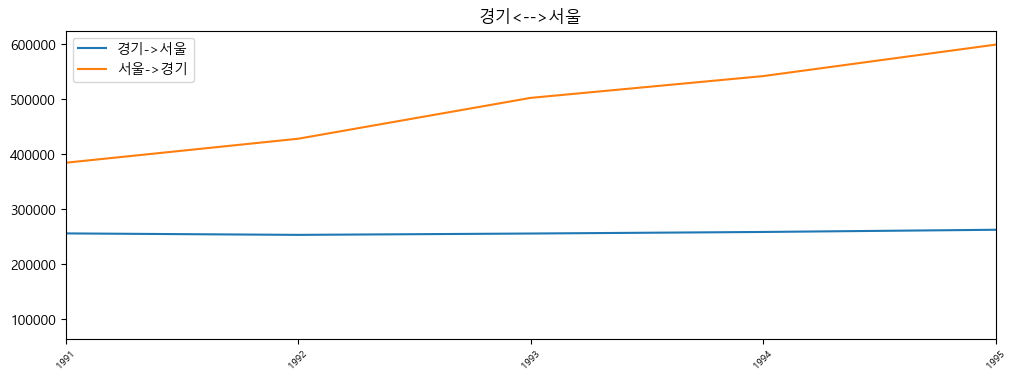

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.title("경기<-->서울")

plt.plot(df3.columns,  df3.values.flatten(), label ='경기->서울' )   # 경기 -> 서울
plt.plot(sr_one.index, sr_one.values,label="서울->경기")           # 서울 -> 경기

plt.xlim('1991','1995')

plt.legend(loc='best')

plt.xticks(rotation=45,fontsize = 7)
plt.show()